I import the libraries I will be using

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

First I read the properties .csv train dat as a pandas dataframe

In [2]:
properties_train = pd.read_csv('Datathon/properties_colombia_train.csv', index_col=False)

In [3]:
properties_train.head(5)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [4]:
properties_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

Here I see the percentage of NaN values in each column

In [3]:
properties_train.isnull().sum()/len(properties_train)*100

Unnamed: 0          0.000000
id                  0.000000
ad_type             0.000000
start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                25.056062
lon                25.056062
l1                  0.000000
l2                  0.000000
l3                  5.584437
l4                 77.035065
l5                 86.125468
l6                 96.523900
rooms              86.060674
bedrooms           79.486102
bathrooms          20.795853
surface_total      96.469737
surface_covered    95.038193
price               0.031891
currency            0.033916
price_period       81.791353
title               0.000506
description         0.061251
property_type       0.000000
operation_type      0.000000
geometry            0.000000
dtype: float64

Since there are some columns with many missing values, I decided to dispose of them

In [4]:
properties_train.drop(columns=['Unnamed: 0', 'id', 'l6', 'l5', 'l4', 'l3', 'rooms', 'bedrooms', 'surface_total', 'surface_covered', 'price_period'], inplace=True)
properties_train.drop(columns=['title', 'description', 'start_date', 'end_date', 'created_on'], inplace=True) # I drop these two columns as well because they are just descriptions and dates no needed for my analysis
properties_train.drop(columns=['l1', 'ad_type', 'currency', 'operation_type'], inplace=True) # These columns have the same information in each entry, so they dont't give me much information

Now I'll work the NaN values from the remaining columns

In [5]:
properties_train.isnull().sum()/len(properties_train)*100

ad_type            0.000000
start_date         0.000000
end_date           0.000000
created_on         0.000000
lat               25.056062
lon               25.056062
l1                 0.000000
l2                 0.000000
bathrooms         20.795853
price              0.031891
currency           0.033916
property_type      0.000000
operation_type     0.000000
geometry           0.000000
dtype: float64

In [6]:
properties_train[properties_train.currency.isna()] # Where there is no currency most of the prices are also missing, so I'll drop those few entries

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,bathrooms,price,currency,property_type,operation_type,geometry
1281,Propiedad,2020-12-02,2021-03-17,2020-12-02,10.937025,-74.790026,Colombia,Atlántico,1.0,NaN,NaN,Casa,Venta,POINT (-74.7900264 10.9370251)
3708,Propiedad,2020-12-22,9999-12-31,2020-12-22,NaN,NaN,Colombia,Atlántico,1.0,NaN,NaN,Casa,Venta,POINT EMPTY
11638,Propiedad,2020-12-03,2021-03-17,2020-12-03,NaN,NaN,Colombia,Atlántico,1.0,NaN,NaN,Apartamento,Venta,POINT EMPTY
12919,Propiedad,2020-10-03,2020-10-09,2020-10-03,6.251000,-75.590000,Colombia,Antioquia,NaN,NaN,NaN,Local comercial,Venta,POINT (-75.59 6.251)
13224,Propiedad,2020-12-10,9999-12-31,2020-12-10,6.217000,-75.571000,Colombia,Antioquia,1.0,NaN,NaN,Oficina,Venta,POINT (-75.571 6.217)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167607,Propiedad,2020-11-19,2020-11-23,2020-11-19,4.668000,-74.053000,Colombia,Cundinamarca,NaN,NaN,NaN,Oficina,Venta,POINT (-74.053 4.668)
172874,Propiedad,2020-10-04,2020-10-09,2020-10-04,3.450000,-76.520000,Colombia,Valle del Cauca,NaN,NaN,NaN,Otro,Venta,POINT (-76.52 3.45)
183842,Propiedad,2020-12-02,2020-12-03,2020-12-02,4.679000,-74.054000,Colombia,Cundinamarca,4.0,NaN,NaN,Apartamento,Venta,POINT (-74.054 4.679)
186102,Propiedad,2020-12-12,2021-01-16,2020-12-12,4.672000,-74.056000,Colombia,Cundinamarca,3.0,NaN,NaN,Apartamento,Venta,POINT (-74.056 4.672)


In [7]:
no_price = properties_train[properties_train.currency.isna()].index
properties_train.drop(no_price, inplace=True)

In [8]:
properties_train.bathrooms.fillna(1.0, inplace=True) # Since there's mostly certain that at least there'll be one bathroom per property, I fill the NaN values with 1.0

I wish to keep the most of locations columns, so I'll just drop the entries with the 'POINT EMPTY' value from the geometry column

In [10]:
properties_train[properties_train.geometry == 'POINT EMPTY'] # These means that in those entries there is no latitude nor longitude data, wich I need to make another column later

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,bathrooms,price,currency,property_type,operation_type,geometry
3,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,1.0,1.310000e+09,COP,Otro,Venta,POINT EMPTY
4,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,2.0,2.100000e+08,COP,Apartamento,Venta,POINT EMPTY
9,Propiedad,2020-08-18,2020-08-25,2020-08-18,NaN,NaN,Colombia,Atlántico,3.0,6.110000e+08,COP,Apartamento,Venta,POINT EMPTY
11,Propiedad,2020-10-13,2020-10-14,2020-10-13,NaN,NaN,Colombia,Antioquia,2.0,2.100000e+08,COP,Apartamento,Venta,POINT EMPTY
12,Propiedad,2020-10-22,2020-10-23,2020-10-22,NaN,NaN,Colombia,Antioquia,5.0,1.430852e+09,COP,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197532,Propiedad,2020-07-30,2020-07-30,2020-07-30,NaN,NaN,Colombia,Antioquia,3.0,4.900000e+08,COP,Apartamento,Venta,POINT EMPTY
197533,Propiedad,2020-11-18,2020-11-19,2020-11-18,NaN,NaN,Colombia,Antioquia,2.0,3.500000e+08,COP,Apartamento,Venta,POINT EMPTY
197537,Propiedad,2020-08-26,2020-08-26,2020-08-26,NaN,NaN,Colombia,Caldas,3.0,1.300000e+09,COP,Otro,Venta,POINT EMPTY
197538,Propiedad,2020-09-03,2020-09-09,2020-09-03,NaN,NaN,Colombia,Valle del Cauca,2.0,2.400000e+08,COP,Casa,Venta,POINT EMPTY


In [11]:
no_point = properties_train[properties_train.geometry == 'POINT EMPTY'].index
properties_train.drop(no_point, inplace=True)

In [12]:
properties_train.isnull().sum()/len(properties_train)*100 # Now I have my Dataframe without NaN values

ad_type           0.0
start_date        0.0
end_date          0.0
created_on        0.0
lat               0.0
lon               0.0
l1                0.0
l2                0.0
bathrooms         0.0
price             0.0
currency          0.0
property_type     0.0
operation_type    0.0
geometry          0.0
dtype: float64

I create my label to predict, that being if the property is considered expensive or not

In [13]:
properties_train.price.mean() # I use the mean of the column price as the delimiter for the categorical labels

676042451.938701

In [14]:
price_condition = [(properties_train.price > properties_train.price.mean()),
                (properties_train.price < properties_train.price.mean())]

price_labels = ['expensive','cheap']

In [15]:
properties_train['label'] = np.select(price_condition, price_labels) # I create the label column with the categorical values

In [16]:
properties_train.head(3)

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,bathrooms,price,currency,property_type,operation_type,geometry,label
0,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,4.0,9.000000e+09,COP,Casa,Venta,POINT (-75.572 6.203),expensive
1,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,2.0,6.250000e+08,COP,Apartamento,Venta,POINT (-74.0731146 4.7227485),cheap
2,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,2.0,4.200000e+08,COP,Casa,Venta,POINT (-74.03 4.709),cheap


In [17]:
properties_train.label.unique()

array(['expensive', 'cheap'], dtype=object)

In [20]:
properties_train.drop(columns='price', inplace=True) # Now I can drop the price column

I'll create a new feature with the cardinal direction of each province from the coordenates of the center of Colombia

4.089722 -72.961944

Latitude > 4.089722 = North

Latitude < 4.089722 = South

Longitude > -72.961944 = East

Longitude < -72.961944 = West


In [63]:
properties_train['cardinal_north'] = properties_train.lat > 4.089722
properties_train['cardinal_south'] = properties_train.lat < 4.089722
properties_train['cardinal_east'] = properties_train.lon > -72.961944
properties_train['cardinal_west'] = properties_train.lon < -72.961944

In [65]:
properties_train.drop(columns=['lat', 'lon', 'geometry'], inplace=True) # I drop the coordenate columns since I wont be using them anymore

Now I want to encode some of the columns including my target label

In [73]:
properties_train.head(5)

,l2,bathrooms,property_type,label,cardinal_north,cardinal_south,cardinal_east,cardinal_west
0,Antioquia,4.0,Casa,1,True,False,False,True
1,Cundinamarca,2.0,Apartamento,0,True,False,False,True
2,Cundinamarca,2.0,Casa,0,True,False,False,True
5,Caldas,2.0,Apartamento,0,True,False,False,True
6,Cundinamarca,8.0,Casa,1,True,False,False,True


In [74]:
label_encoder = LabelEncoder() # I will be using LabelEncoder from the Sklearn library

In [35]:
properties_train.label = label_encoder.fit_transform(properties_train.label)

In [36]:
properties_train.label.values # The values of 1 refer to expensive properties and the values of 0 to the cheap properties

array([1, 0, 0, ..., 0, 0, 0])

In [37]:
properties_train.drop(columns='price', inplace=True) # Now I can drop the price column

KeyError: "['price'] not found in axis"

I can use the LabelEncoder to encode the cardinal direction columns since there are boolean values

In [75]:
properties_train.cardinal_north = label_encoder.fit_transform(properties_train.cardinal_north)
properties_train.cardinal_south = label_encoder.fit_transform(properties_train.cardinal_south)
properties_train.cardinal_east = label_encoder.fit_transform(properties_train.cardinal_east)
properties_train.cardinal_west = label_encoder.fit_transform(properties_train.cardinal_west)

In [85]:
properties_train.l2 = label_encoder.fit_transform(properties_train.l2)
properties_train.bathrooms = label_encoder.fit_transform(properties_train.bathrooms)
properties_train.property_type = label_encoder.fit_transform(properties_train.property_type)

In [94]:
properties_train = properties_train[['l2', 'bathrooms', 'property_type', 'cardinal_north', 'cardinal_south', 'cardinal_east', 'cardinal_west', 'label']]

I use a correlation heatmap to see wich features have the most correlation

<AxesSubplot: >

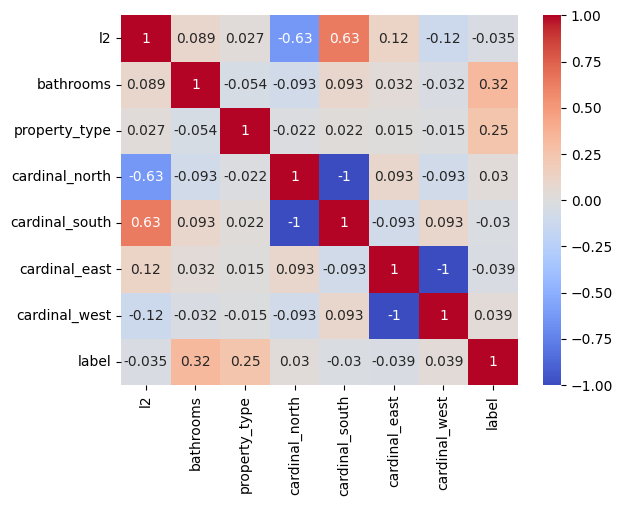

In [96]:
corr = properties_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [97]:
properties_train = properties_train[['bathrooms', 'property_type', 'label']] # I will keep these two columns to train my model

I import the model to use, in this case a Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [159]:
X_train, y_train = properties_train[['bathrooms', 'property_type']], properties_train.label

In [160]:
LogReg.fit(X_train, y_train) # I train the model with the train data

LogisticRegression()

Now I need the test data from another Dataset

In [161]:
properties_test = pd.read_csv('Datathon/properties_colombia_test.csv') # I need to apply to this dataframe the same transformations I did to the properties_train dataframe

In [162]:
properties_test.drop(columns=['Unnamed: 0', 'id', 'l6', 'l5', 'l4', 'l3', 'rooms', 'bedrooms', 'surface_total', 'surface_covered', 'price_period'], inplace=True)
properties_test.drop(columns=['title', 'description', 'start_date', 'end_date', 'created_on'], inplace=True)
properties_test.drop(columns=['l1', 'ad_type', 'currency', 'operation_type'], inplace=True)
properties_test.l2 = label_encoder.fit_transform(properties_test.l2)
properties_test.bathrooms = label_encoder.fit_transform(properties_test.bathrooms)
properties_test.property_type = label_encoder.fit_transform(properties_test.property_type)
properties_test = properties_test[['bathrooms', 'property_type']]
X_test = properties_test[['bathrooms', 'property_type']]

In [163]:
y_pred = LogReg.predict(X_test) # I save the prediction of my model in a variable

I will export the prediction to a csv file

In [165]:
y_pred = pd.DataFrame(y_pred, columns=['pred'])

In [166]:
y_pred

,pred
0,0
1,0
2,0
3,1
4,0
...,...
65845,1
65846,0
65847,1
65848,0


In [167]:
y_pred.to_csv('Auli3.csv', index=False)